In [2]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

Скачаем датасет [дохода](https://www.kaggle.com/datasets/uciml/adult-census-income?resource=download)

In [3]:
!gdown 1wTnVJsNOJ06186mxHli_4VKUoecUKcea

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [4]:
df = pd.read_csv('./adult.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
target = 'income'

In [8]:
# заэнкодим наш таргет в 0 и 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

In [10]:
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [11]:
for c in num_cols:
    
    # попытаемся разбить численные колонки на 10 бинов
    _, bins = pd.qcut(train_df[c], q=10, duplicates='drop', retbins=True)
    
    print(c, 'number of bins:', len(bins) - 1)

age number of bins: 10
fnlwgt number of bins: 10
education.num number of bins: 6
capital.gain number of bins: 1
capital.loss number of bins: 1
hours.per.week number of bins: 6


True     22386
False     2034
Name: capital.gain, dtype: int64

<AxesSubplot:>

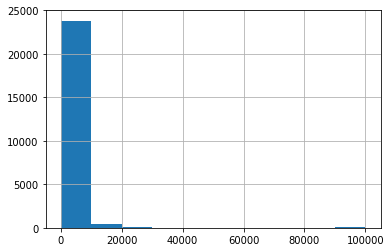

In [12]:
# capital.gain и capital.loss получились с одним бином

# Посмотрим на них поподробнее
display((train_df['capital.gain'] == 0).value_counts())
train_df['capital.gain'].hist()

True     23271
False     1149
Name: capital.loss, dtype: int64

<AxesSubplot:>

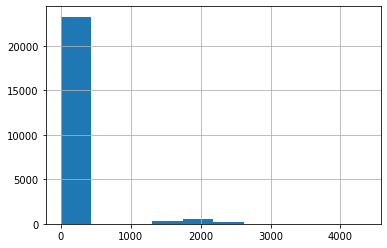

In [13]:
display((train_df['capital.loss'] == 0).value_counts())
train_df['capital.loss'].hist()

In [14]:
# Сделаем из них бинарную колонку со значением 0, если в оригинальной колонке стоял 0 и 1 иначе

train_df['capital.gain'] = (train_df['capital.gain'] != 0).astype('int')
train_df['capital.loss'] = (train_df['capital.loss'] != 0).astype('int')

test_df['capital.gain'] = (test_df['capital.gain'] != 0).astype('int')
test_df['capital.loss'] = (test_df['capital.loss'] != 0).astype('int')

In [15]:
num_cols = ['age', 'fnlwgt', 'education.num', 'hours.per.week']

In [16]:
for c in num_cols:
    
    # попытаемся разбить численные колонки на 10 бинов
    _, bins = pd.qcut(train_df[c], q=10, duplicates='drop', retbins=True)
    
    print(c, 'number of bins:', len(bins) - 1)
    
    # Так как бины строятся по train выборке, они могут охватить не весь диапазон значений
    # Расширим первый и последний бины на всю ось
    bins[0] = -np.inf
    bins[-1] = np.inf
    
    train_df[c] = pd.cut(train_df[c], bins=bins)
    test_df[c] = pd.cut(test_df[c], bins=bins)

age number of bins: 10
fnlwgt number of bins: 10
education.num number of bins: 6
hours.per.week number of bins: 6


In [17]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB

In [18]:
cnb = CategoricalNB()

In [19]:
x_cols = train_df.drop(target, axis=1).columns

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
train_df[x_cols]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29,"(37.0, 41.0]",Private,"(158825.6, 178623.0]",10th,"(-inf, 7.0]",Never-married,Prof-specialty,Not-in-family,White,Male,0,1,"(55.0, inf]",United-States
12181,"(22.0, 26.0]",Private,"(131230.0, 158825.6]",Bachelors,"(11.0, 13.0]",Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,"(35.0, 40.0]",United-States
18114,"(58.0, inf]",Self-emp-not-inc,"(178623.0, 196872.4]",Some-college,"(9.0, 10.0]",Divorced,Exec-managerial,Not-in-family,White,Male,0,0,"(40.0, 50.0]",United-States
4278,"(45.0, 50.0]",Federal-gov,"(220019.0, 259948.6]",Bachelors,"(11.0, 13.0]",Divorced,Exec-managerial,Not-in-family,White,Male,0,0,"(50.0, 55.0]",United-States
12050,"(22.0, 26.0]",?,"(131230.0, 158825.6]",Some-college,"(9.0, 10.0]",Never-married,?,Not-in-family,White,Male,0,0,"(35.0, 40.0]",United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,"(22.0, 26.0]",Private,"(327789.9, inf]",HS-grad,"(7.0, 9.0]",Never-married,Craft-repair,Own-child,White,Male,0,0,"(35.0, 40.0]",United-States
5390,"(50.0, 58.0]",Private,"(131230.0, 158825.6]",Assoc-voc,"(10.0, 11.0]",Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,"(35.0, 40.0]",United-States
860,"(50.0, 58.0]",Federal-gov,"(220019.0, 259948.6]",HS-grad,"(7.0, 9.0]",Married-civ-spouse,Tech-support,Husband,White,Male,0,1,"(35.0, 40.0]",United-States
15795,"(37.0, 41.0]",Private,"(131230.0, 158825.6]",Some-college,"(9.0, 10.0]",Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,"(40.0, 50.0]",United-States


In [22]:
ord_enc = OrdinalEncoder()

train_df[x_cols] = ord_enc.fit_transform(train_df[x_cols])

test_df[x_cols] = ord_enc.transform(test_df[x_cols])

In [23]:
train_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
29,5.0,4.0,4.0,0.0,0.0,4.0,10.0,1.0,4.0,1.0,0.0,1.0,5.0,39.0,1
12181,1.0,4.0,3.0,9.0,4.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,2.0,39.0,0
18114,9.0,6.0,5.0,15.0,2.0,0.0,4.0,1.0,4.0,1.0,0.0,0.0,3.0,39.0,0
4278,7.0,1.0,7.0,9.0,4.0,0.0,4.0,1.0,4.0,1.0,0.0,0.0,4.0,39.0,1
12050,1.0,0.0,3.0,15.0,2.0,4.0,0.0,1.0,4.0,1.0,0.0,0.0,2.0,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,1.0,4.0,9.0,11.0,1.0,4.0,3.0,3.0,4.0,1.0,0.0,0.0,2.0,39.0,0
5390,8.0,4.0,3.0,8.0,3.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,2.0,39.0,1
860,8.0,1.0,7.0,11.0,1.0,2.0,13.0,0.0,4.0,1.0,0.0,1.0,2.0,39.0,1
15795,5.0,4.0,3.0,15.0,2.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,3.0,39.0,1


In [24]:
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]

X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

In [25]:
from sklearn.naive_bayes import CategoricalNB

In [26]:
cat_nb = CategoricalNB()
cat_nb.fit(X_train, y_train)

CategoricalNB()

In [27]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [33]:
def show_metrics(y_true, y_pred):
    
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    
    for msg, metric in zip(
        ['accuracy', 'precision', 'recall', 'f1', 'roc auc'],
        [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]):
        print(f"{msg:10}", round(metric(y_true, y_pred)*100, 1))

In [34]:
y_train

29       1
12181    0
18114    0
4278     1
12050    0
        ..
29802    0
5390     1
860      1
15795    1
23654    0
Name: income, Length: 24420, dtype: int32

accuracy   81.8
precision  59.5
recall     77.6
f1         67.4
roc auc    80.4


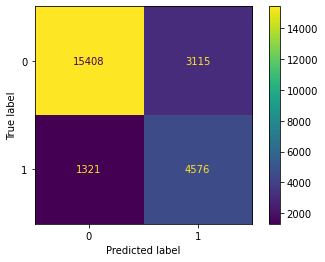

In [35]:
show_metrics(y_train, cat_nb.predict(X_train))

accuracy   81.5
precision  58.7
recall     75.5
f1         66.1
roc auc    79.4


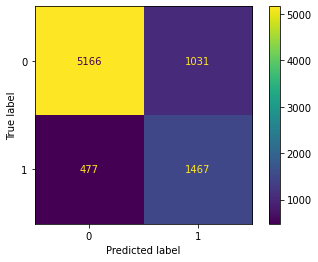

In [36]:
show_metrics(y_test, cat_nb.predict(X_test))

In [37]:
roc_auc_score(y_train, cat_nb.predict_proba(X_train)[:, 1])

0.8945788136059272

In [38]:
roc_auc_score(y_test, cat_nb.predict_proba(X_test)[:, 1])

0.8888040542649404

In [39]:
from sklearn.datasets import load_iris

In [40]:
iris_data = load_iris(as_frame=True)

In [41]:
iris_df = iris_data['data']
iris_df['target'] = iris_data['target']

In [42]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='tab10')

NameError: name 'sns' is not defined

In [44]:
train_df, test_df = train_test_split(iris_df, test_size=0.5, random_state=42)

In [45]:
x_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [46]:
X_train = train_df[x_cols]
y_train = train_df['target']

X_test = test_df[x_cols]
y_test = test_df['target']

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()

In [51]:
gnb.fit(X_train, y_train)

GaussianNB()

In [52]:
import matplotlib.colors as colors

In [53]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
accuracy_score(y_train, gnb.predict(X_train)), accuracy_score(y_test, gnb.predict(X_test))

(0.92, 0.9866666666666667)

In [56]:
y_train

84     1
148    2
53     1
5      0
93     1
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 75, dtype: int32

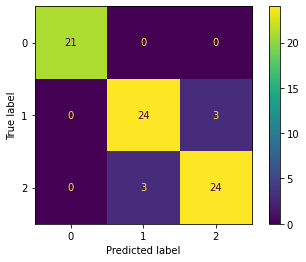

In [55]:
ConfusionMatrixDisplay.from_predictions(y_train, gnb.predict(X_train))

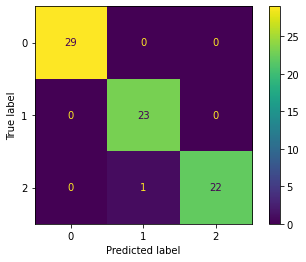

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, gnb.predict(X_test))

# Домашка

## Naive Bayes

1. Реализовать Наивный Байесовский классификатор для *непрерывных* фичей, используя гауссиану в качестве функции правдоподобия

Функция правдоподобия: $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

Подробнее [тут](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

P.S. Не забудьте логарифмировать вероятности для стабильности

In [12]:
from __future__ import annotations

from scipy.special import softmax

In [13]:
class MyGaussianNB:
    
    def __init__(self):
        self.mus = None
        self.sigmas = None
       
    
    def fit(self, X: Union[pd.DataFrame, pd.Series, np.ndarray], y: Union[pd.Series, np.ndarray]) -> MyGaussianNB:
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.to_numpy()
            y = y.to_numpy()
            
        mus, sigmas, classes_prior = [], [], []
        
        for c in np.unique(y):
            mus.append(np.mean(X[y == c], axis=0))
            sigmas.append(np.std(X[y == c], axis=0))
            classes_prior.append(np.sum(y == c))
            
        self.mus = np.array(mus).T
        self.sigmas = np.array(sigmas).T
        
        self.classes = np.unique(y)
        self.classes_prior = np.array(classes_prior) / len(y)
        
        return self
    
    
    def predict(self, X: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:        
        return self.classes[np.argmax(self.likehood(X), axis=1)]
    
    
    def predict_proba(self, X: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:
        return softmax(self.likehood(X))
    
    
    def likehood(self, X: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.to_numpy()
            
        norm_pdf = lambda X, mus, sigmas: np.exp(-(X - mus) ** 2 / (2 * sigmas ** 2)) / np.sqrt(2 * np.pi * sigmas ** 2)
            
        _likehood = np.array([np.log(norm_pdf(X, self.mus[:, c], self.sigmas[:, c])).sum(axis=1) 
                              + np.log(self.classes_prior[c]) for c in range(len(self.classes_prior))]).T
        
        return _likehood
        

In [17]:
my_gnb = MyGaussianNB()
my_gnb.fit(X_train, y_train)

In [19]:
my_gnb.likehood(X_test[:5])

array([[-269.47595436,   -1.27759761,   -6.7822352 ],
       [  -3.60503928,  -32.99683607,  -62.42811493],
       [-837.93401629,  -29.67007834,   -9.53711858],
       [-269.28330382,   -1.20282272,   -5.55340617],
       [-309.00810128,   -2.48769706,   -4.661191  ]])

In [50]:
# iris
accuracy_score(y_train, my_gnb.predict(X_train)), accuracy_score(y_test, my_gnb.predict(X_test))

(0.92, 0.9866666666666667)

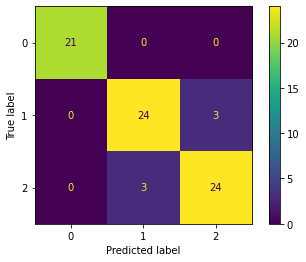

In [51]:
ConfusionMatrixDisplay.from_predictions(y_train, my_gnb.predict(X_train));

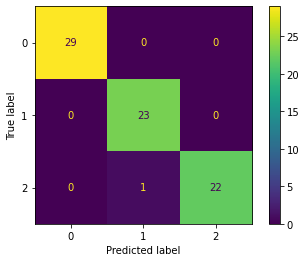

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, my_gnb.predict(X_test));

In [ ]:
class MyGaussianNB:
    def __init__(self):
        
        # Массив средних значений для каждой фичи, для каждого класса
        # (размер NxK, где N - кол-во фичей, K - кол-во классов)
        self.mus = None

        # Массив стандартных среднеквадратических отклоенний для каждой фичи
        # для каждого класса (размер NxK, где N - кол-во фичей, K - кол-во классов)
        self.sigmas = None
    
    def fit(X, y):
        # Пройтись по всем классам и посчитать для каждой фичи для каждого класса их среднее
        # и стандартное среднеквадратичное отклонение
        # Запомнить их для дальнейшей оценки функции правдоподобия
        pass
    
    def predict(X):
        # Используя метод likelihood посчитать функции правдоподобия для каждой
        # строчки для каждого класса. Для каждой строчки выбрать класс с
        # максимальным значением функции правдоподобия
        pass
    
    def predict_proba(X):
        # Применить функцию softmax (scipy.special.softmax) на выходы likelihood
        pass
    
    def likelihood(X):
        # Для каждого класса посчитать функции правдоподобия для каждой фичи
        # Прологарифмировать и сложить их между собой и добавить логарифм
        # априорной вероятности соответствующего класса
        # Получится матрица размером NxK, где N - кол-во строк, K - кол-во классов
        pass

2. Реализовать Наивный Байесовский классификатор для *категориальных* фичей

Функция правдоподобия: $P(x_i = t \mid y = c \: ;\, \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$
                                       
Подробнее [Тут](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)

P.S. Не забудьте логарифмировать вероятности для стабильности

In [ ]:
class MyCategoryNB:
    
    def __init__(self, alpha=1):
        self.alpha = alpha
        
    
    def fit(self, X: Union[pd.DataFrame, pd.Series, np.ndarray], y: Union[pd.Series, np.ndarray]) -> MyCategoryNB:
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.to_numpy()
            y = y.to_numpy()
            
        P = []
        for c in np.unique(y):
            N_c = np.sum(y == c)
            for f_i in range(X.shape[1]):
                X_ic = X[y == c, f_i]
                n_i = len(np.unique(X[:, f_i]))
                
                P.append({ t:(np.sum(X_ic == t) + self.alpha) / N_c + self.alpha * n_i for t in np.unique(X_ic)})
                
        return self
    
    
    def predict(self, X: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:
        pass
    
    
    def predict_proba(self, X: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:
        pass
    
    
    def likehood(self, X: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:
        pass
    

In [58]:
X = np.array([[1, 67, 12],
              [15, 40, 39],
              [58, 23, 14],
              [7, 2, 84]])

y = np.array([0, 1, 2, 0])

In [62]:
X[:, 0]

array([ 1, 15, 58,  7])

In [ ]:
class MyCategoryNB:
    def __init__(self, alpha=1):
        # Сглаживающая константа, для того, чтобы предотвратить перемножение на 0
        # Если какой-то категории не встречается
        self.alpha = alpha
    
    def fit(X, y):
        # Пройтись по всем классам и посчитать для каждой фичи для каждого класса
        # её распределение (отнормированное) по категориям с учетом сглаживающей константы alpha
        # То есть отношение количества раз сколько встречается данная категория в данной фиче для данного класса
        # плюс alpha к общему количеству наблюдений для этого класса плюс alpha * кол-во уникальных категорий 
        # для данной фичи

        # Запомнить их для дальнейшей оценки функции правдоподобия
        pass
    
    def predict(X):
        # Используя метод likelihood посчитать функции правдоподобия для каждой строчки для каждого класса
        # Для каждой строчки выбрать класс с максимальным значением функции правдоподобия
        pass
    
    def predict_proba(X):
        # Применить функцию softmax (scipy.special.softmax) на выходы likelihood
        pass
    
    def likelihood(X):
        # Для каждого класса посчитать функции правдоподобия для каждой фичи
        # Прологарифмировать и сложить их между собой и добавить логарифм априорной вероятности соответствующего класса
        # Получится матрица размером NxK, где N - кол-во строк, K - кол-во классов
        pass

3. Воспользовавшись двумя реализованными классификаторами, применить их на датасет adult income.

Отдельно применить свой классификатор для каждого типа фичей (методом likelihood). Затем сложить получившиеся логарифмы функций правдоподобия и взять от них argmax.

Сравнить метрики с получившимися на лекции.

4. Реализовать самостоятельно функцию ROC AUC

    * Начинать алгоритм на плоскости в точке (0;0);
    * Отсортировать по убыванию пары (y_true, score) по score (в качестве скора взять predict_proba от 1);
    * Идти по отсортированным парам и если y_true 1, то идти вверх по y на 1, если 0, то вправо по x на 1. В получившейся координате ставить точку;
    * Таким образом пройтись по всему массиву пар и отложить n точек;
    * Отнормировать все точки: по y разделить на max(y), по x разделить на max(x);
    * Посчитать площать под графиком из получившихся точек (numpy.trapz);
    * Сравнить ответ с функцией roc_auc_score из sklearn.

Так же попробовать вместо y_pred отдать какую-нибудь фичу в качестве параметра score и так же сравнить ответы с roc_auc_score их sklearn

(Доп. задание) Визуализировать получившуюся ROC кривую

In [ ]:
def roc_auc(y_true, score):
    pass

5. (Доп. задание) Наивный Байесовский классификатор с помощью Kernel Density Estimator

Использовать [Kernel Density Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity)
с гауссианом в качестве ядра

Аппроксимировать плотности распределения для каждой фичи для каждого класса, обучая Kernel Density Estimator'ы

Затем, получив значения функций правдоподобия из этих эстиматоров методом score_samples, сложить их между собой (они уже отлогарифмированны) и сложить с логарифмом априорной верояности сооответствубщего класса, и выбрать класс с максимальным значением

## Log Reg

Построить на adult income логрег и сравнить результаты с наивным Байесем (матрица ошибок, roc_auc, accuracy, precision, recall, f1)